### MNIST 测试实战

In [2]:
#%%
import  matplotlib
from    matplotlib import pyplot as plt
# Default parameters for plots
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
matplotlib.rcParams['font.family'] = ['STKaiTi']
matplotlib.rcParams['axes.unicode_minus']=False 
import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import datasets, layers, optimizers
import  os

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
print(tf.__version__)

2.0.0


In [3]:
def preprocess(x, y): 
    # [b, 28, 28], [b]
    print(x.shape,y.shape)
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [-1, 28*28])
    y = tf.cast(y, dtype=tf.int32)
    y = tf.one_hot(y, depth=10)

    return x,y

In [4]:
#%%
(x, y), (x_test, y_test) = datasets.mnist.load_data()
print('x:', x.shape, 'y:', y.shape, 'x test:', x_test.shape, 'y test:', y_test)
#%%
batchsz = 512
train_db = tf.data.Dataset.from_tensor_slices((x, y))
train_db = train_db.shuffle(1000)
train_db = train_db.batch(batchsz)
train_db = train_db.map(preprocess)
train_db = train_db.repeat(20)
#%%
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_db = test_db.shuffle(1000).batch(batchsz).map(preprocess)
x,y = next(iter(train_db))
print('train sample:', x.shape, y.shape)
# print(x[0], y[0])

x: (60000, 28, 28) y: (60000,) x test: (10000, 28, 28) y test: [7 2 1 ... 4 5 6]
(None, 28, 28) (None,)
(None, 28, 28) (None,)
train sample: (512, 784) (512, 10)


0 loss: 1.2149078845977783
0 Evaluate Acc: 0.09
80 loss: 0.19296982884407043
80 Evaluate Acc: 0.2193
160 loss: 0.15477244555950165
160 Evaluate Acc: 0.3154
240 loss: 0.1261068880558014
240 Evaluate Acc: 0.3757
320 loss: 0.11551767587661743
320 Evaluate Acc: 0.4229
400 loss: 0.10927289724349976
400 Evaluate Acc: 0.4612
480 loss: 0.1000388041138649
480 Evaluate Acc: 0.4922
560 loss: 0.09607715904712677
560 Evaluate Acc: 0.5188
640 loss: 0.0892365351319313
640 Evaluate Acc: 0.5439
720 loss: 0.08116162568330765
720 Evaluate Acc: 0.5632
800 loss: 0.07944047451019287
800 Evaluate Acc: 0.5815
880 loss: 0.07787884026765823
880 Evaluate Acc: 0.5977
960 loss: 0.07733837515115738
960 Evaluate Acc: 0.6145
1040 loss: 0.07565061748027802
1040 Evaluate Acc: 0.6285
1120 loss: 0.07635928690433502
1120 Evaluate Acc: 0.6413
1200 loss: 0.06763695180416107
1200 Evaluate Acc: 0.653
1280 loss: 0.06768001616001129
1280 Evaluate Acc: 0.6651
1360 loss: 0.0708494782447815
1360 Evaluate Acc: 0.6755
1440 loss: 0.0

findfont: Font family ['STKaiTi'] not found. Falling back to DejaVu Sans.
C:\Users\l-kim\.conda\envs\tensorflow-gpu\lib\site-packages\matplotlib\textpath.py:90: RuntimeWarning: Glyph 35757 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\l-kim\.conda\envs\tensorflow-gpu\lib\site-packages\matplotlib\textpath.py:90: RuntimeWarning: Glyph 32451 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\l-kim\.conda\envs\tensorflow-gpu\lib\site-packages\matplotlib\textpath.py:203: RuntimeWarning: Glyph 35757 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
C:\Users\l-kim\.conda\envs\tensorflow-gpu\lib\site-packages\matplotlib\textpath.py:203: RuntimeWarning: Glyph 32451 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
C:\Users\l-kim\.conda\envs\tensorflow-gpu\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35757 missing from current fon

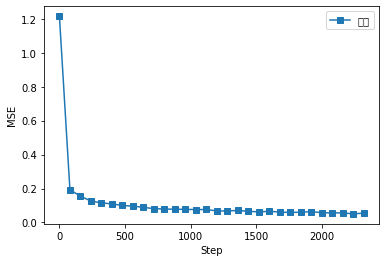

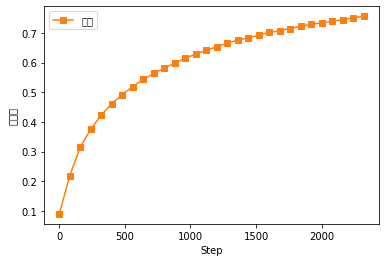

In [5]:
#%%
def main():
    # learning rate
    lr = 1e-2
    accs,losses = [], []
    # 784 => 512
    w1, b1 = tf.Variable(tf.random.normal([784, 256], stddev=0.1)), tf.Variable(tf.zeros([256]))
    # 512 => 256
    w2, b2 = tf.Variable(tf.random.normal([256, 128], stddev=0.1)), tf.Variable(tf.zeros([128]))
    # 256 => 10
    w3, b3 = tf.Variable(tf.random.normal([128, 10], stddev=0.1)), tf.Variable(tf.zeros([10]))

    for step, (x,y) in enumerate(train_db):
        # [b, 28, 28] => [b, 784]
        x = tf.reshape(x, (-1, 784))
        with tf.GradientTape() as tape:
            # layer1.
            h1 = x @ w1 + b1
            h1 = tf.nn.relu(h1)
            # layer2
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # output
            out = h2 @ w3 + b3
            # out = tf.nn.relu(out)
            # compute loss
            # [b, 10] - [b, 10]
            loss = tf.square(y-out)
            # [b, 10] => scalar
            loss = tf.reduce_mean(loss)
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3]) 
        for p, g in zip([w1, b1, w2, b2, w3, b3], grads):
            p.assign_sub(lr * g)
        # print
        if step % 80 == 0:
            print(step, 'loss:', float(loss))
            losses.append(float(loss))
 
        if step %80 == 0:
            # evaluate/test
            total, total_correct = 0., 0
            for x, y in test_db:
                # layer1.
                h1 = x @ w1 + b1
                h1 = tf.nn.relu(h1)
                # layer2
                h2 = h1 @ w2 + b2
                h2 = tf.nn.relu(h2)
                # output
                out = h2 @ w3 + b3
                # [b, 10] => [b]
                pred = tf.argmax(out, axis=1)
                # convert one_hot y to number y
                y = tf.argmax(y, axis=1)
                # bool type
                correct = tf.equal(pred, y)
                # bool tensor => int tensor => numpy
                total_correct += tf.reduce_sum(tf.cast(correct, dtype=tf.int32)).numpy()
                total += x.shape[0]
            print(step, 'Evaluate Acc:', total_correct/total)
            accs.append(total_correct/total)

    plt.figure()
    x = [i*80 for i in range(len(losses))]
    plt.plot(x, losses, color='C0', marker='s', label='训练')
    plt.ylabel('MSE')
    plt.xlabel('Step')
    plt.legend()
    plt.savefig('train.svg')

    plt.figure()
    plt.plot(x, accs, color='C1', marker='s', label='测试')
    plt.ylabel('准确率')
    plt.xlabel('Step')
    plt.legend()
    plt.savefig('test.svg')

if __name__ == '__main__':
    main()